**Data Analysis on Football Players**
**#C222**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import files 
uploaded = files.upload()

df = pd.read_csv('Football Players Stats.csv', encoding = 'ISO-8859-1')
df

Saving Football Players Stats.csv to Football Players Stats (2).csv


,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(691, 30)

In [19]:
df.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


In [20]:
#selecting the columns of our interest
df = df[['Player', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s','Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR']]
df.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,7.0,9.0,2.0,2.0,6.0,0.0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,0.0,5.0,0.0,0.0,8.0,1.0
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,4.0,7.0,0.0,0.0,4.0,0.0


In [21]:
df.isnull().sum()

Player      0
Team        0
Nation      3
Pos         0
Age         4
MP          0
Starts      0
Min       145
90s       144
Gls       144
Ast       144
G-PK      144
PK        144
PKatt     144
CrdY      144
CrdR      144
dtype: int64

In [24]:
df = df.dropna()
df.shape

(546, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 682
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  546 non-null    object 
 1   Team    546 non-null    object 
 2   Nation  546 non-null    object 
 3   Pos     546 non-null    object 
 4   Age     546 non-null    float64
 5   MP      546 non-null    int64  
 6   Starts  546 non-null    int64  
 7   Min     546 non-null    object 
 8   90s     546 non-null    float64
 9   Gls     546 non-null    float64
 10  Ast     546 non-null    float64
 11  G-PK    546 non-null    float64
 12  PK      546 non-null    float64
 13  PKatt   546 non-null    float64
 14  CrdY    546 non-null    float64
 15  CrdR    546 non-null    float64
dtypes: float64(9), int64(2), object(5)
memory usage: 72.5+ KB


In [26]:
df['Min'] = df['Min'].replace(',', '', regex = True)

In [27]:
df['Nation'].values[:10]

array(['eng\xa0ENG', 'br\xa0BRA', 'eng\xa0ENG', 'eng\xa0ENG', 'no\xa0NOR',
       'ch\xa0SUI', 'gh\xa0GHA', 'sct\xa0SCO', 'eng\xa0ENG', 'br\xa0BRA'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


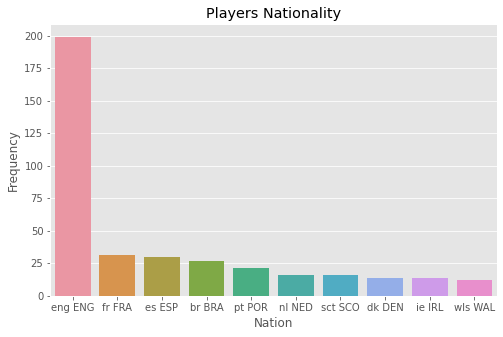

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (8, 5))
sns.barplot(df['Nation'].value_counts()[:10].index,
           df['Nation'].value_counts()[:10].values)
plt.title('Players Nationality')
plt.xlabel('Nation')
plt.ylabel('Frequency')
plt.show()

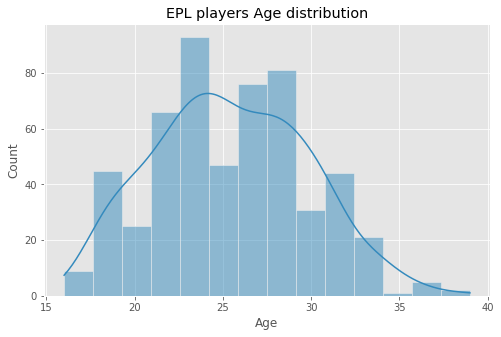

In [29]:
plt.figure(figsize = (8, 5))
sns.histplot(df['Age'], kde = True)
plt.title('EPL players Age distribution')
plt.show()

In [30]:
df[df['Gls'] == df['Gls'].max()]

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
356,Mohamed Salah,Liverpool,eg EGY,FW,29.0,35,30,2762,30.7,23.0,13.0,18.0,5.0,6.0,1.0,0.0
556,Son Heung-min,Tottenham Hotspur,kr KOR,"FW,MF",29.0,35,35,3006,33.4,23.0,7.0,23.0,0.0,0.0,2.0,0.0


In [31]:
df['Goal_per_min'] = df['Gls'] / df['Min'].astype(int)
df.sort_values(by = 'Goal_per_min', ascending = False).head(10)

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Goal_per_min
375,Divock Origi,Liverpool,be BEL,FW,26.0,7,0,133,1.5,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.022556
373,Takumi Minamino,Liverpool,jp JPN,"FW,MF",26.0,11,1,186,2.1,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.016129
482,Jeff Hendrick,Newcastle United,ie IRL,MF,29.0,3,0,72,0.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.013889
445,Donny van de Beek,Manchester United,nl NED,MF,24.0,8,0,75,0.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.013333
356,Mohamed Salah,Liverpool,eg EGY,FW,29.0,35,30,2762,30.7,23.0,13.0,18.0,5.0,6.0,1.0,0.0,0.008327
328,Jamie Vardy,Leicester City,eng ENG,FW,34.0,25,20,1806,20.1,15.0,2.0,15.0,0.0,0.0,2.0,0.0,0.008306
556,Son Heung-min,Tottenham Hotspur,kr KOR,"FW,MF",29.0,35,35,3006,33.4,23.0,7.0,23.0,0.0,0.0,2.0,0.0,0.007651
399,Riyad Mahrez,Manchester City,dz ALG,FW,30.0,28,15,1498,16.6,11.0,5.0,7.0,4.0,5.0,0.0,0.0,0.007343
423,Cristiano Ronaldo,Manchester United,pt POR,FW,36.0,30,27,2456,27.3,18.0,3.0,15.0,3.0,3.0,8.0,0.0,0.007329
392,Kevin De Bruyne,Manchester City,be BEL,MF,30.0,30,25,2201,24.5,15.0,8.0,15.0,0.0,0.0,2.0,0.0,0.006815


In [32]:
cards_df = df.groupby(['Team']).agg({'CrdY':'sum','CrdR':'sum'}).sort_values(by = 'CrdY', ascending = False)
cards_df.head()

,CrdY,CrdR
Team,,
Leeds United,100.0,3.0
Everton,82.0,6.0
Aston Villa,81.0,2.0
Newcastle United,81.0,2.0
Manchester United,77.0,2.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


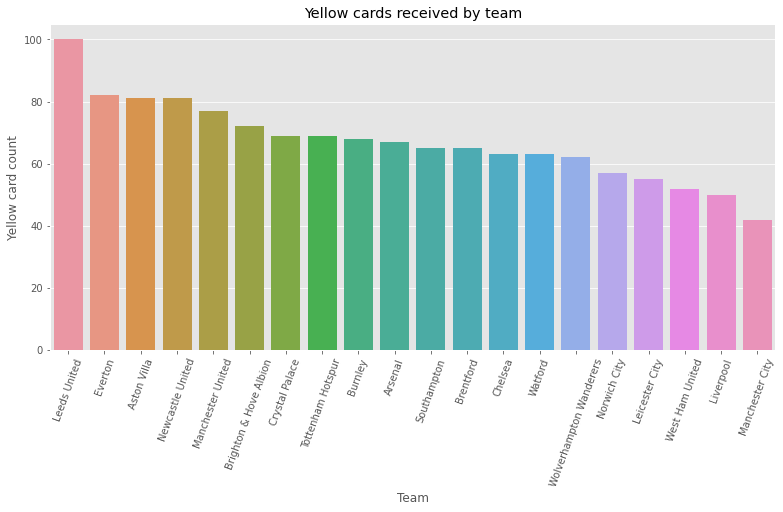

In [33]:
plt.figure(figsize = (13, 6))
sns.barplot(cards_df.index, cards_df['CrdY'])
plt.xticks(rotation = 70)
plt.title('Yellow cards received by team')
plt.ylabel('Yellow card count')
plt.show()